In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score 
from pgmpy.base import DAG
from IPython.display import Image, display
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BayesianEstimator

# Introduction

# Theoretical Introduction

## Bayesian network

A Bayesian network is a type of probabilistic graphical model that represents a set of variables and their conditional dependencies through a directed acyclic graph (DAG). In a Bayesian network, each node represents a random variable, while each edge (or directed link) represents a conditional dependency between these variables. This structure is particularly useful for modeling complex systems where multiple factors interact with each other, allowing for a visual and computational approach to understand how different factors influence one another.

The primary components of a Bayesian network are:
- Nodes (Variables): Each node in the network represents a specific variable, such as age, smoking status, or a health condition like diabetes. These variables can be categorical or continuous.
- Edges (Dependencies): Directed edges between nodes represent conditional dependencies. For instance, if there is a directed edge from smoking status to hypertension, this suggests that smoking status is conditionally dependent on hypertension, implying that the likelihood of having hypertension may vary based on smoking habits.
- Conditional Probability Tables (CPTs): Each node in the network is associated with a conditional probability table that quantifies the strength of dependencies. For example, a node representing hypertension might include probabilities for the likelihood of having hypertension given different levels of physical activity.

Bayesian networks use Bayes' theorem to update the probabilities of different outcomes when new evidence is introduced. This feature is especially powerful in situations where the data is uncertain or incomplete, as it allows the network to calculate the most likely values of unknown variables based on the observed data.

__Why Bayesian Networks Are Useful?__

Bayesian networks are ideal for applications where multiple factors interact in uncertain ways, such as in medicine, genetics, and risk assessment. They are particularly valuable for:

- Making Inferences: Bayesian networks can predict the likelihood of certain events or conditions based on observed variables. For example, if a patient's age and smoking status are known, a Bayesian network could estimate their risk of developing hypertension.

- Visualizing Dependencies: By representing dependencies graphically, Bayesian networks provide insights into how variables relate to each other. This can reveal both direct and indirect influences on an outcome, helping identify the most critical factors.

- Handling Uncertainty: Since Bayesian networks are probabilistic, they can effectively model scenarios with incomplete or noisy data, updating predictions as more information becomes available.

In the context of this project on cardiovascular health, a Bayesian network can help identify which lifestyle factors and medical conditions are most influential in cardiovascular disease risk. By examining these probabilistic dependencies, we gain insights into the complex interactions among risk factors, allowing us to make more informed predictions and recommendations.

# Exploratory data analysis

The first part of the work plan involves performing an **exploratory data analysis** on the dataset to understand the characteristics and distributions of each variable. This step is essential for gaining initial insights into the data.

The relevant variables are grouped as follows:
- __Non-modifiable__ CV risk factors: sex, age, education level, and socioeconomic status
- __Modifiable__ CV risk factors: body mass index, physical activity, sleep duration, smoking
profile, anxiety, and depression
- __Medical conditions__: hypertension, hypercholesterolemia, and diabetes


First of all, it's important to note the particularities of the dataset, such as its size and the variables available in the dataset.

In [29]:
df = pd.read_csv('cardiovascular_train.csv')
print("Dataset length: ", len(df))
print("Dataset variables: ",[k for k in df.keys()])

Dataset length:  3845
Dataset variables:  ['Age', 'Anxiety', 'BodyMassIndex', 'Depression', 'Diabetes', 'EducationLevel', 'Hypercholesterolemia', 'Hypertension', 'PhysicalActivity', 'Sex', 'SleepDuration', 'SmokerProfile', 'SocioeconomicStatus']


After checking that all the variables are present in the dataset, it is now possible to analyze each one in particular.

## Non-modifiable variables

### Age

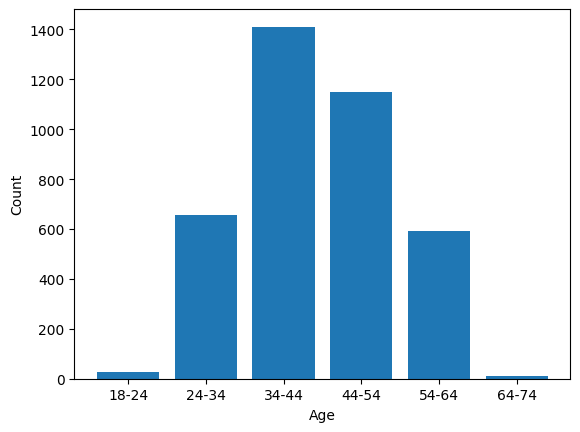

Age
18-24      28
24-34     655
34-44    1411
44-54    1148
54-64     594
64-74       9
Name: count, dtype: int64


In [30]:
age_counts = df['Age'].value_counts()

# Sorting the index for ordered display (optional)
age_counts = age_counts.sort_index()

# Creating the bar plot
plt.bar(age_counts.index, age_counts.values)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()
print(age_counts)

### EducationLevel

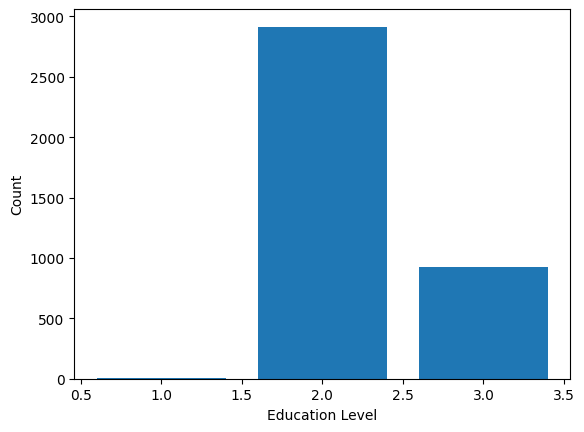

EducationLevel
1       5
2    2914
3     926
Name: count, dtype: int64


In [31]:
el_counts = df['EducationLevel'].value_counts()

# Sorting the index for ordered display (optional)
el_counts = el_counts.sort_index()

# Creating the bar plot
plt.bar(el_counts.index, el_counts.values)

# Adding labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()
print(el_counts)

### Sex

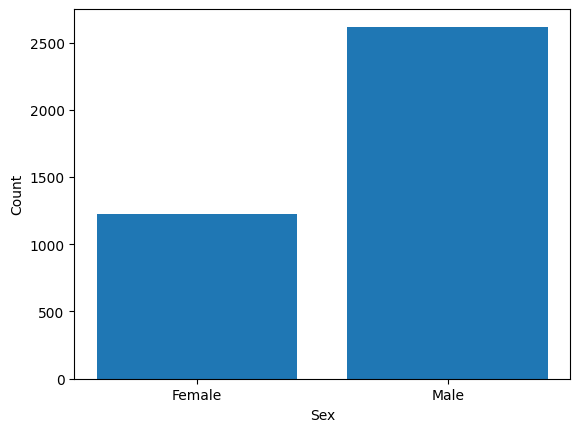

Sex
Female    1227
Male      2618
Name: count, dtype: int64


In [32]:
sex_counts = df['Sex'].value_counts()

# Sorting the index for ordered display (optional)
sex_counts = sex_counts.sort_index()

# Creating the bar plot
plt.bar(sex_counts.index, sex_counts.values)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sex_counts)

### SocioeconomicStatus

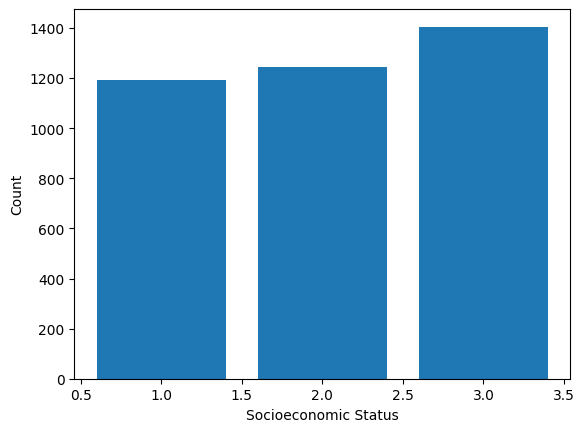

SocioeconomicStatus
1    1194
2    1246
3    1405
Name: count, dtype: int64


In [33]:
ss_counts = df['SocioeconomicStatus'].value_counts()

# Sorting the index for ordered display (optional)
ss_counts = ss_counts.sort_index()

# Creating the bar plot
plt.bar(ss_counts.index, ss_counts.values)

# Adding labels and title
plt.xlabel('Socioeconomic Status')
plt.ylabel('Count')

# Show the plot
plt.show()
print(ss_counts)

## Modifiable variables

### Anxiety

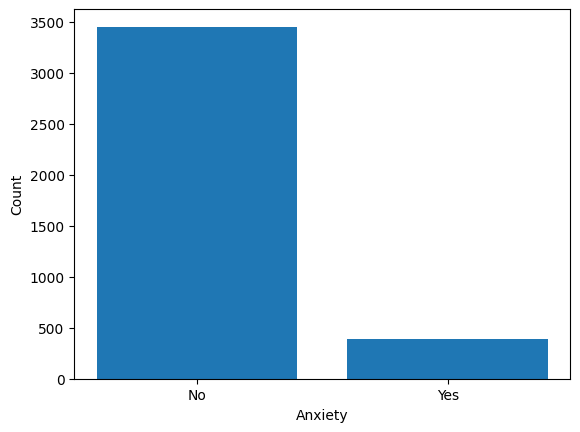

Anxiety
No     3454
Yes     391
Name: count, dtype: int64


In [34]:
anx_counts = df['Anxiety'].value_counts()

# Sorting the index for ordered display (optional)
anx_counts = anx_counts.sort_index()

# Creating the bar plot
plt.bar(anx_counts.index, anx_counts.values)

# Adding labels and title
plt.xlabel('Anxiety')
plt.ylabel('Count')

# Show the plot
plt.show()
print(anx_counts)

### BodyMassIndex

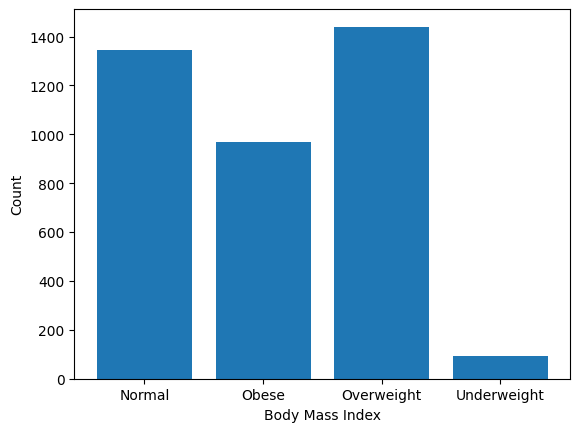

BodyMassIndex
Normal         1344
Obese           968
Overweight     1440
Underweight      93
Name: count, dtype: int64


In [35]:
bmi_counts = df['BodyMassIndex'].value_counts()

# Sorting the index for ordered display (optional)
bmi_counts = bmi_counts.sort_index()

# Creating the bar plot
plt.bar(bmi_counts.index, bmi_counts.values)

# Adding labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')

# Show the plot
plt.show()
print(bmi_counts)

### Depression

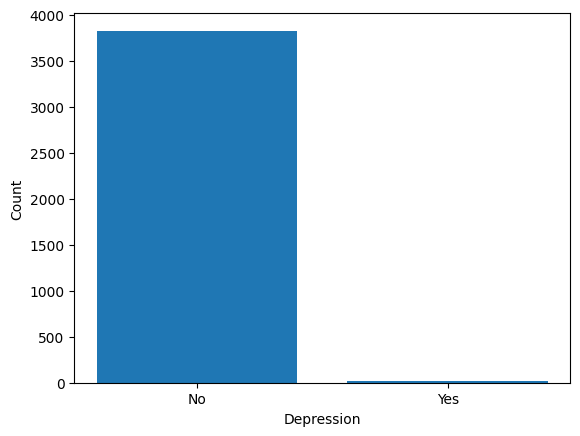

Depression
No     3824
Yes      21
Name: count, dtype: int64


In [36]:
dp_counts = df['Depression'].value_counts()

# Sorting the index for ordered display (optional)
dp_counts = dp_counts.sort_index()

# Creating the bar plot
plt.bar(dp_counts.index, dp_counts.values)

# Adding labels and title
plt.xlabel('Depression')
plt.ylabel('Count')

# Show the plot
plt.show()
print(dp_counts)

### PhysicalActivity

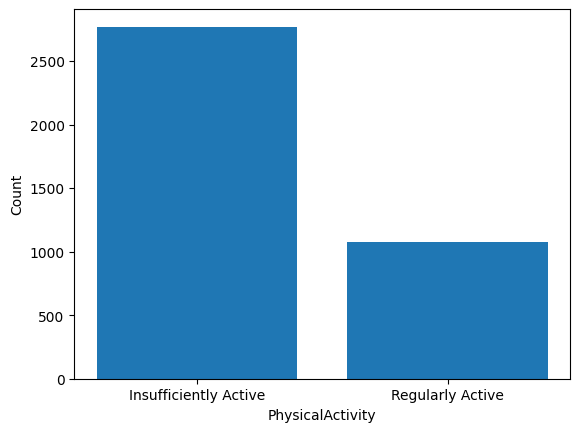

PhysicalActivity
Insufficiently Active    2770
Regularly Active         1075
Name: count, dtype: int64


In [37]:
pa_counts = df['PhysicalActivity'].value_counts()

# Sorting the index for ordered display (optional)
pa_counts = pa_counts.sort_index()

# Creating the bar plot
plt.bar(pa_counts.index, pa_counts.values)

# Adding labels and title
plt.xlabel('PhysicalActivity')
plt.ylabel('Count')

# Show the plot
plt.show()
print(pa_counts)

## SleepDuration

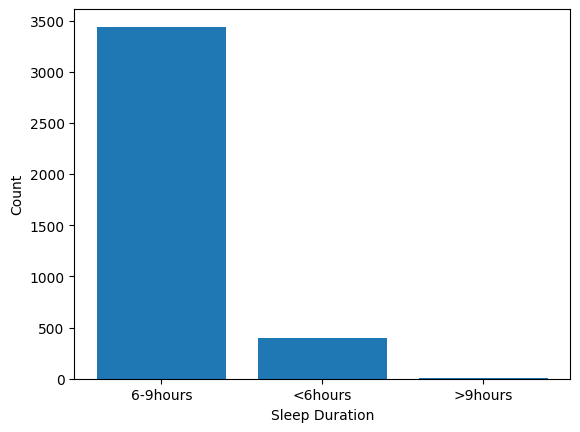

SleepDuration
6-9hours    3440
<6hours      401
>9hours        4
Name: count, dtype: int64


In [38]:
sd_counts = df['SleepDuration'].value_counts()

# Sorting the index for ordered display (optional)
sd_counts = sd_counts.sort_index()

# Creating the bar plot
plt.bar(sd_counts.index, sd_counts.values)

# Adding labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sd_counts)

## SmokerProfile

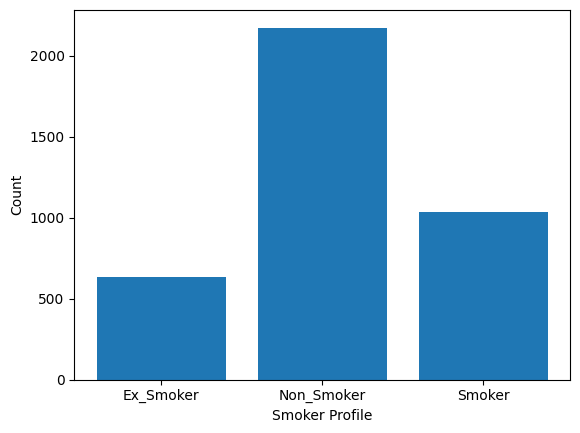

SmokerProfile
Ex_Smoker      632
Non_Smoker    2175
Smoker        1038
Name: count, dtype: int64


In [39]:
sp_counts = df['SmokerProfile'].value_counts()

# Sorting the index for ordered display (optional)
sp_counts = sp_counts.sort_index()

# Creating the bar plot
plt.bar(sp_counts.index, sp_counts.values)

# Adding labels and title
plt.xlabel('Smoker Profile')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sp_counts)

### Conclusions

- Anxiety and depression are medical conditions, although they are not the focus here. These variables take only two values, ‘yes’, the patient suffers from this condition, or ‘no’, otherwise.
- __10.17%__ of patients have __anxiety__
- __0.54%__ of patients have __depression__
- 3845

- The sleep duration variable can assume 3 values: 6-9hours, <6hours and >9hours
- __89.47%__ of patients sleep __6-9hours__
- __10.43%__ of patients sleep __<6hours__
- __only 4__ patients sleep __>9hours__

- The smoke profile variable can assume 3 values: non-smoker, smoker and ex-smoker
- __16.43%__ of patients are __ex-smokers__
- __56.57%__ of patients are __non-smokers__
- __27.00%__ of patients have __smokers__

## Medical Conditions

### Diabetes

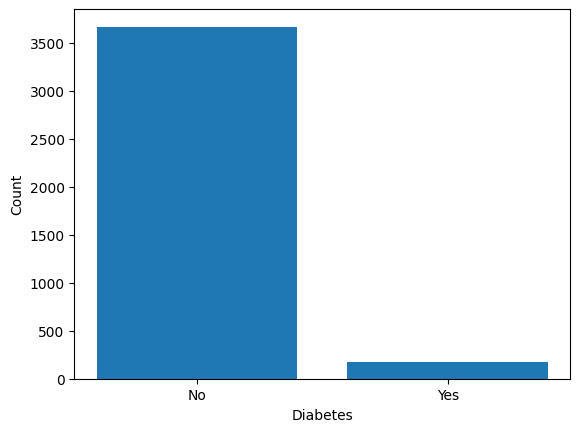

Diabetes
No     3669
Yes     176
Name: count, dtype: int64


In [40]:
db_counts = df['Diabetes'].value_counts()

# Sorting the index for ordered display (optional)
db_counts = db_counts.sort_index()

# Creating the bar plot
plt.bar(db_counts.index, db_counts.values)

# Adding labels and title
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Show the plot
plt.show()
print(db_counts)

### Hypercholesterolemia

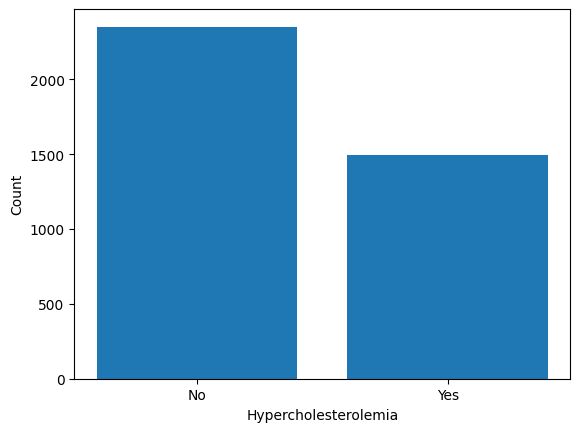

Hypercholesterolemia
No     2351
Yes    1494
Name: count, dtype: int64


In [41]:
hc_counts = df['Hypercholesterolemia'].value_counts()

# Sorting the index for ordered display (optional)
hc_counts = hc_counts.sort_index()

# Creating the bar plot
plt.bar(hc_counts.index, hc_counts.values)

# Adding labels and title
plt.xlabel('Hypercholesterolemia')
plt.ylabel('Count')

# Show the plot
plt.show()
print(hc_counts)

### Hypertension

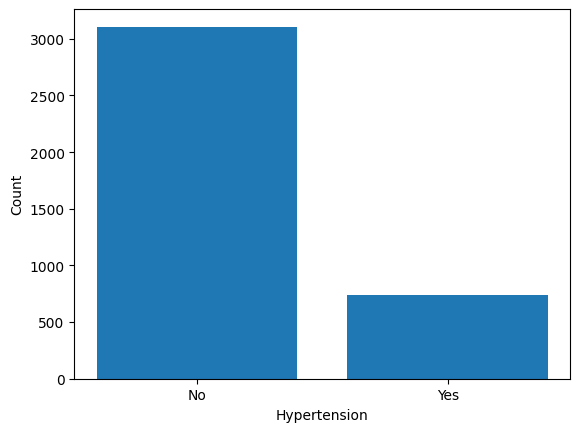

Hypertension
No     3107
Yes     738
Name: count, dtype: int64


In [42]:
ht_counts = df['Hypertension'].value_counts()

# Sorting the index for ordered display (optional)
ht_counts = ht_counts.sort_index()

# Creating the bar plot
plt.bar(ht_counts.index, ht_counts.values)

# Adding labels and title
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Show the plot
plt.show()
print(ht_counts)

### Conclusions

- The 3 variables vary between yes and no, meaning that a patient has this medical condition or not, respectively.
- __4.57%__ of patients have __diabetes__
- __38.86%__ of patients have __hypercholesterolemia__
- __19.19%__ of patients have __hypercholesterolemia__

# Learn a Bayesian network from the data

The second part of this project is dedicated to constructing a Bayesian network model from the dataset to capture the dependencies and relationships between different factors presented in this problem.

This process requires careful consideration, as the Bayesian network may have relationships that are not intuitively plausible, such as linking body mass index as a cause of age, which is unlikely. In such cases, adjustments can be made to force certain connections that align with established medical understanding, like the influence of physical activity on conditions such as hypertension or hypercholesterolemia. However, it’s important to limit these manual modifications to avoid introducing bias and to rely predominantly on the algorithm to learn the structure autonomously.

The constructed network will serve as a powerful tool for examining complex dependencies and for conducting in-depth analyses. For example, we will be able to investigate how age affects sleep duration, assess the impact of smoking on various medical conditions, and determine how body mass index influences diabetes, hypertension, and hypercholesterolemia. By understanding these dependencies, this Bayesian network can provide valuable insights into cardiovascular disease risk profiles, helping to identify the most critical factors that contribute to these conditions. 


In [43]:
def initialize_graph(nodes,p=1):
  G = DAG()
  G.add_nodes_from(nodes=nodes)
  init = G.get_random(n_nodes=len(nodes), edge_prob=p)
  ls = []
  mapping = {}
  for k in range(len(nodes)):
      mapping[k] = nodes[k]
  for i,j in init.edges:
    ls.append((mapping[i],mapping[j]))
  ls
  G.add_edges_from(ebunch=ls) # G is the required initialization for the Hill Climbing method
  return G

In [44]:
k2 = K2Score(df)
es = HillClimbSearch(data=df)
best_model = es.estimate(scoring_method=k2, start_dag=initialize_graph(nodes = df.keys(), p=1))
print('Edges:', best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Age', 'BodyMassIndex'), ('Age', 'Hypercholesterolemia'), ('Age', 'PhysicalActivity'), ('Age', 'Sex'), ('Age', 'SleepDuration'), ('Age', 'SmokerProfile'), ('Age', 'SocioeconomicStatus'), ('Anxiety', 'BodyMassIndex'), ('Anxiety', 'SleepDuration'), ('Anxiety', 'SmokerProfile'), ('Anxiety', 'SocioeconomicStatus'), ('Depression', 'SleepDuration'), ('Depression', 'SmokerProfile'), ('Depression', 'SocioeconomicStatus'), ('Depression', 'BodyMassIndex'), ('Diabetes', 'Hypercholesterolemia'), ('Diabetes', 'Hypertension'), ('Diabetes', 'PhysicalActivity'), ('Diabetes', 'Sex'), ('Diabetes', 'SleepDuration'), ('Diabetes', 'SmokerProfile'), ('Diabetes', 'SocioeconomicStatus'), ('Diabetes', 'BodyMassIndex'), ('EducationLevel', 'SleepDuration'), ('EducationLevel', 'SmokerProfile'), ('EducationLevel', 'SocioeconomicStatus'), ('EducationLevel', 'BodyMassIndex'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SleepDuration'), ('Hypercholesterolemia', 'SmokerProfile'), ('Hyp

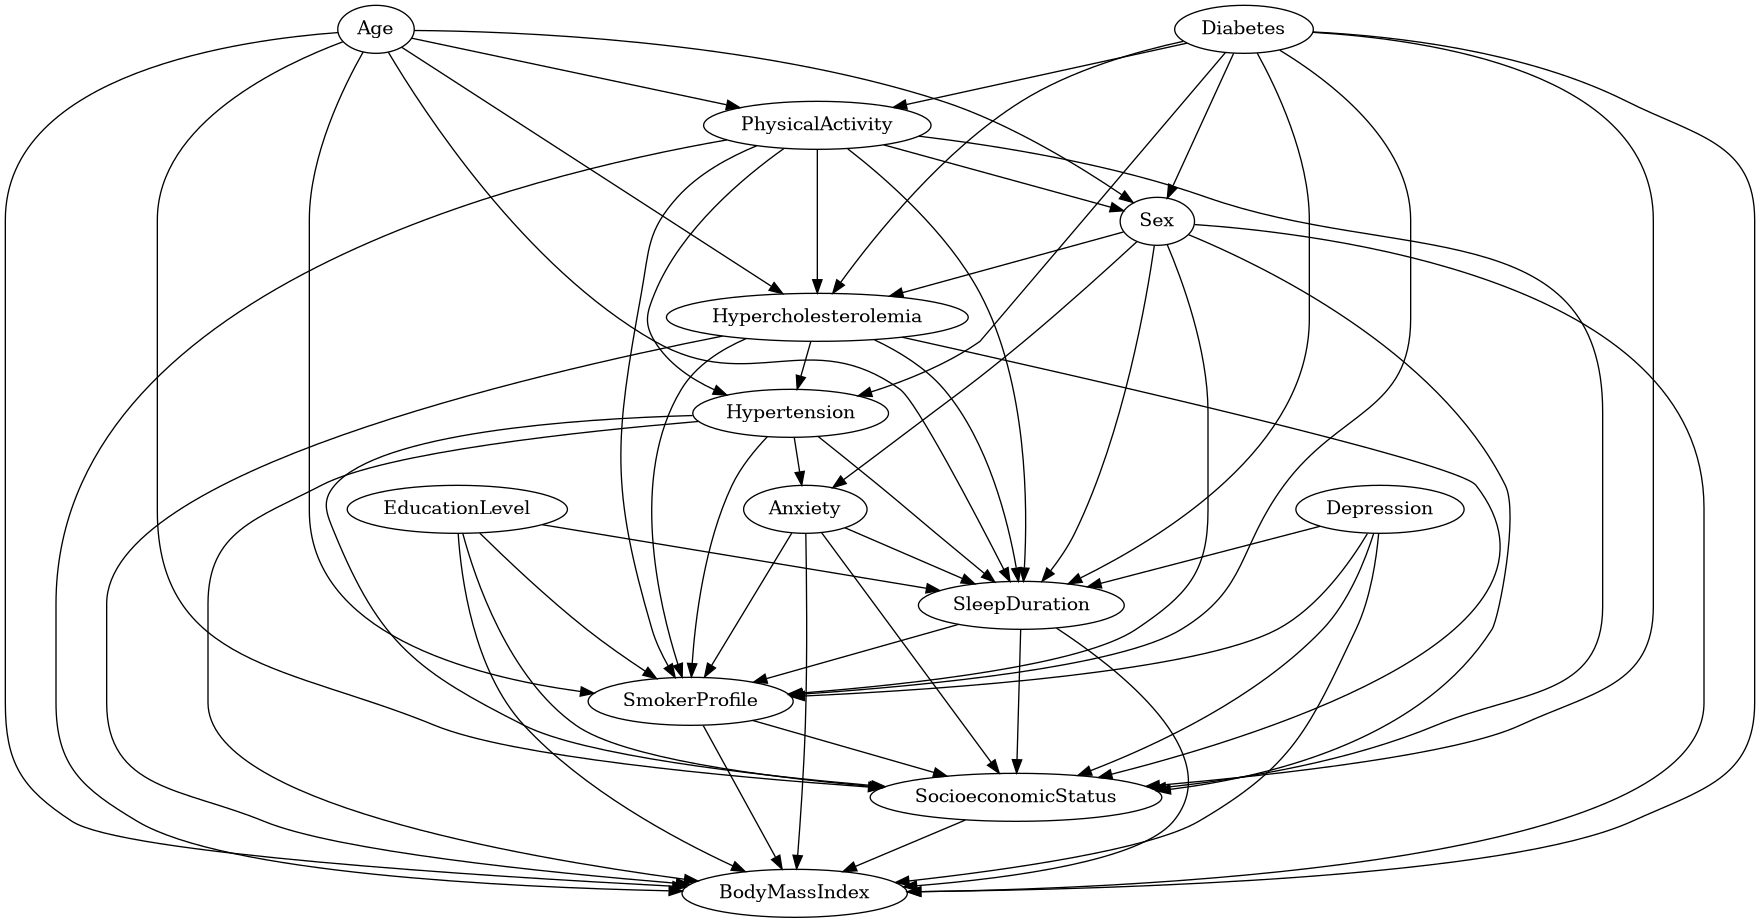

In [45]:


m = best_model.to_graphviz()
img = m.draw(format='png',prog="dot")
display(Image(img))

In [46]:


# Define the scoring method and search method
k2 = K2Score(df)
es = HillClimbSearch(data=df)

# Define whitelist and blacklist edges based on domain knowledge
whitelist = [
    ("Age", "Hypertension"), 
    ("Age", "Hypercholesterolemia"),
    ("BodyMassIndex", "Hypertension"), 
    ("Anxiety", "Hypertension"),
    ("PhysicalActivity", "BodyMassIndex"),
    ("Diabetes", "Hypertension"),
    ("Depression", "PhysicalActivity")
]


blacklist = [
    ("Anxiety", "Age"),
    ("BodyMassIndex", "Age"),
    ("Depression", "Age"),
    ("Diabetes", "Age"),
    ("EducationLevel", "Age"),
    ("Hypercholesterolemia", "Age"),
    ("Hypertension", "Age"),
    ("PhysicalActivity", "Age"),
    ("Sex", "Age"),
    ("SleepDuration", "Age"),
    ("SmokerProfile", "Age"),
    ("SocioeconomicStatus", "Age"),

    ("Anxiety", "Sex"),
    ("BodyMassIndex", "Sex"),
    ("Depression", "Sex"),
    ("Diabetes", "Sex"),
    ("EducationLevel", "Sex"),
    ("Hypercholesterolemia", "Sex"),
    ("Hypertension", "Sex"),
    ("PhysicalActivity", "Sex"),
    ("Age", "Sex"),
    ("SleepDuration", "Sex"),
    ("SmokerProfile", "Sex"),
    ("SocioeconomicStatus", "Sex"),
    
    ("EducationLevel", "Hypercholesterolemia"),
    ("SleepDuration", "SocioeconomicStatus"),
    ("SmokerProfile","EducationLevel"),
    ("Sex","EducationLevel"),
    ("Anxiety","SocioeconomicStatus"),
    ("PhysicalActivity","SocioeconomicStatus")  
]

best_model = es.estimate(scoring_method=k2, start_dag=initialize_graph(nodes = df.keys(), p=1), black_list= blacklist, white_list= whitelist)

for edge in blacklist:
    if edge in best_model.edges():
        best_model.remove_edge(*edge)

print("Edges:", len(best_model.edges()))
print("Bayesian score:", k2.score(best_model))


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: 40
Bayesian score: -3747.371567255228


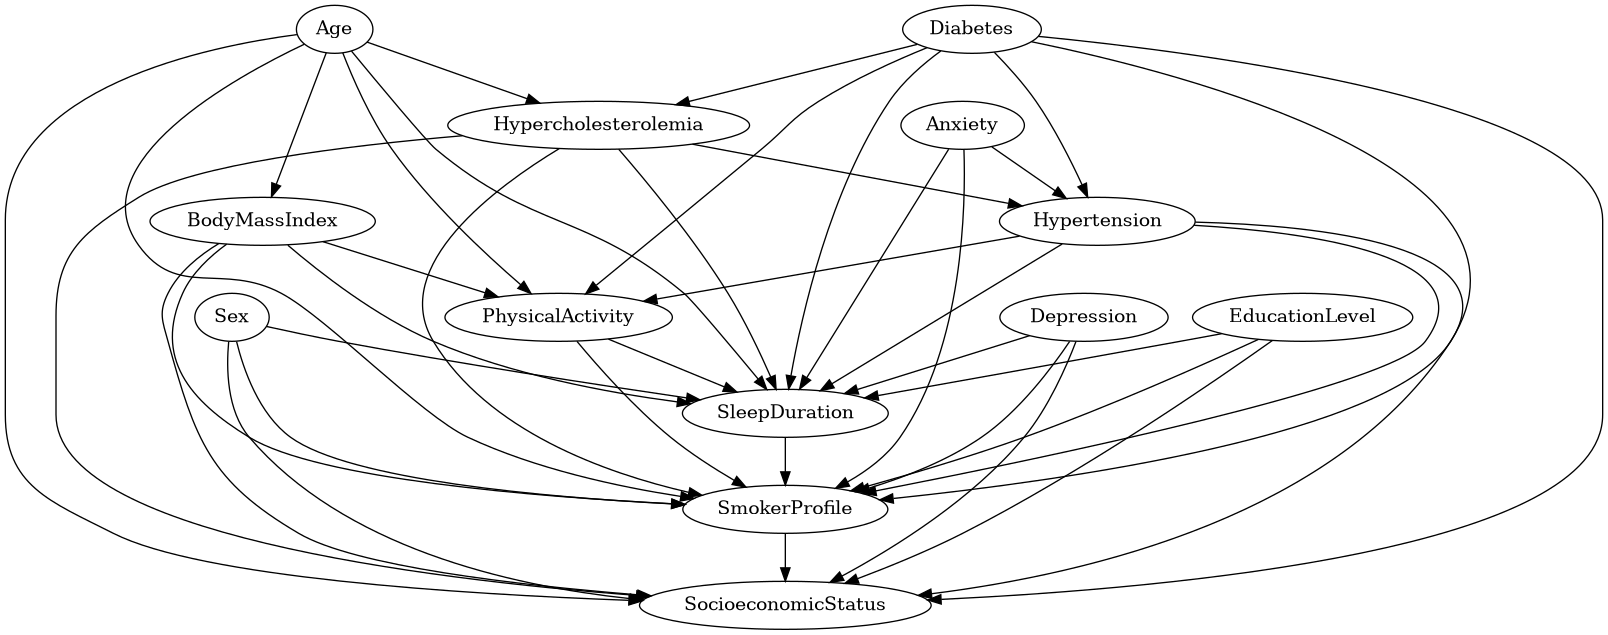

In [47]:
m = best_model.to_graphviz()
img = m.draw(format='png',prog="dot")
display(Image(img))

# Network and problem analysis

In [48]:
# Convert best_model (DAG) to BayesianNetwork
bayesian_model = BayesianNetwork(best_model.edges())

bayesian_model.fit(df, estimator=BayesianEstimator)

# Perform Variable Elimination inference
infer = VariableElimination(bayesian_model)

In [77]:
def infer_and_plot(model, target_var, evidence_var):
    
    # Get all possible values for the evidence variable
    evidence_values = model.get_cpds(evidence_var).state_names[evidence_var]
    target_states = model.get_cpds(target_var).state_names[target_var]
    
    inference_results = {state: [] for state in target_states}

    # Perform inference for each value of the evidence variable
    for value in evidence_values:
        evidence = {evidence_var: value}
        query_result = infer.query([target_var], evidence=evidence)
        print(evidence_var + " - " +  value)
        print(query_result)
        
        # Extract the probability distribution from the query result
        probabilities = query_result.values  # Array of probabilities
        for state, prob in zip(target_states, probabilities):
            inference_results[state].append(prob)


    # Plotting the results
    for state, probabilities in inference_results.items():
        
        plt.plot(evidence_values, probabilities, marker='o', label=f"{target_var}={state}")

    plt.xticks(rotation=45)
    plt.xlabel(evidence_var)
    plt.ylabel("phi("+target_var+","+evidence_var+")")
    plt.title(f"Inference of {target_var} based on {evidence_var}")
    plt.legend()
    plt.tight_layout()
    plt.show()



Age - 18-24
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.6286 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.1857 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.1857 |
+-------------------------+----------------------+
Age - 24-34
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.8798 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0845 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0357 |
+-------------------------+----------------------+
Age - 34-44
+-------------------------+-------------------

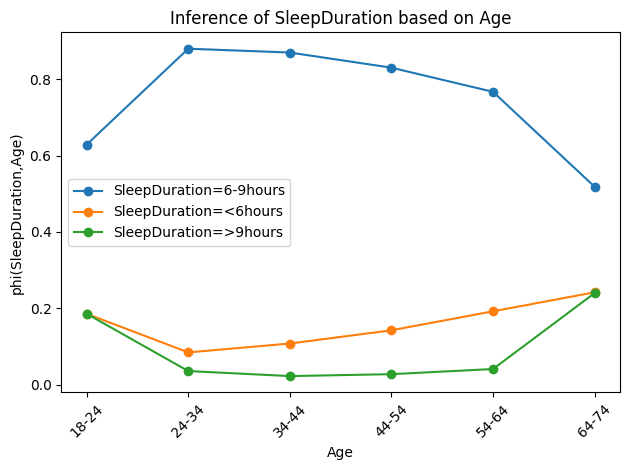

In [78]:
infer_and_plot(bayesian_model, 'SleepDuration', 'Age')

SmokerProfile - Ex_Smoker
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9322 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0678 |
+---------------+-----------------+
SmokerProfile - Non_Smoker
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9672 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0328 |
+---------------+-----------------+
SmokerProfile - Smoker
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9412 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0588 |
+---------------+-----------------+


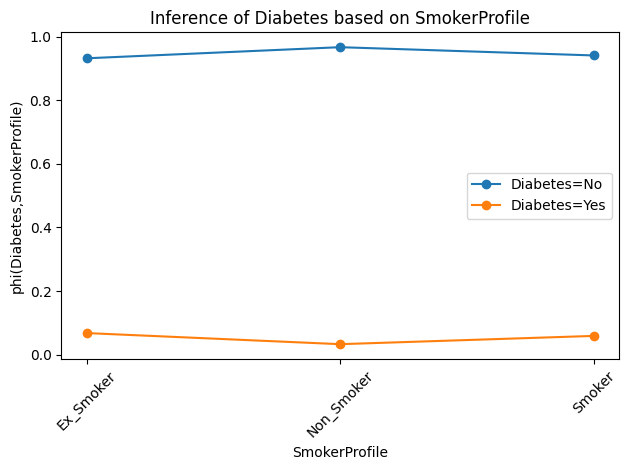

In [79]:
infer_and_plot(bayesian_model, 'Diabetes', 'SmokerProfile')

SmokerProfile - Ex_Smoker
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8116 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1884 |
+-------------------+---------------------+
SmokerProfile - Non_Smoker
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8234 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1766 |
+-------------------+---------------------+
SmokerProfile - Smoker
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.7746 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.2254 |
+-------------------+---------------------+


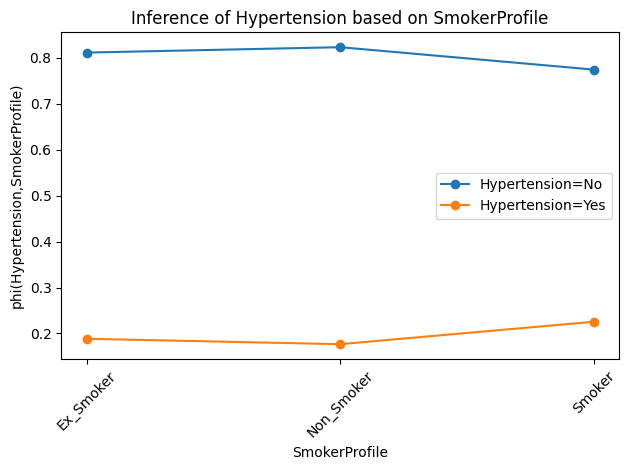

In [80]:
infer_and_plot(bayesian_model, 'Hypertension', 'SmokerProfile')

SmokerProfile - Ex_Smoker
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.5547 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.4453 |
+---------------------------+-----------------------------+
SmokerProfile - Non_Smoker
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.6543 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.3457 |
+---------------------------+-----------------------------+
SmokerProfile - Smoker
+---------------------------+-----------------------------+
| Hypercholesterolemia  

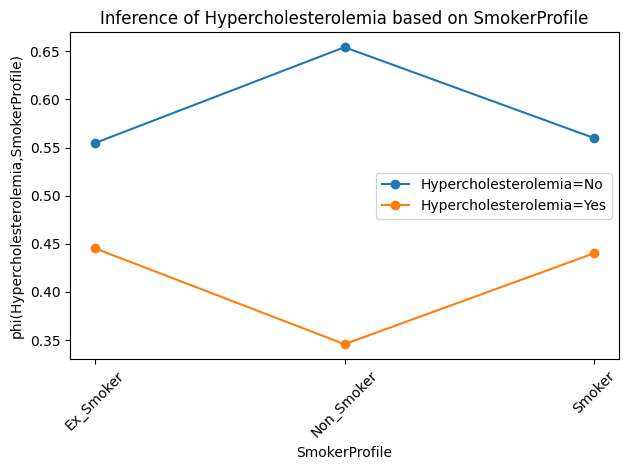

In [81]:
infer_and_plot(bayesian_model, 'Hypercholesterolemia', 'SmokerProfile')

BodyMassIndex - Normal
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9536 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0464 |
+---------------+-----------------+
BodyMassIndex - Obese
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9536 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0464 |
+---------------+-----------------+
BodyMassIndex - Overweight
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9536 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0464 |
+---------------+-----------------+
BodyMassIndex - Underweight
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9536 |


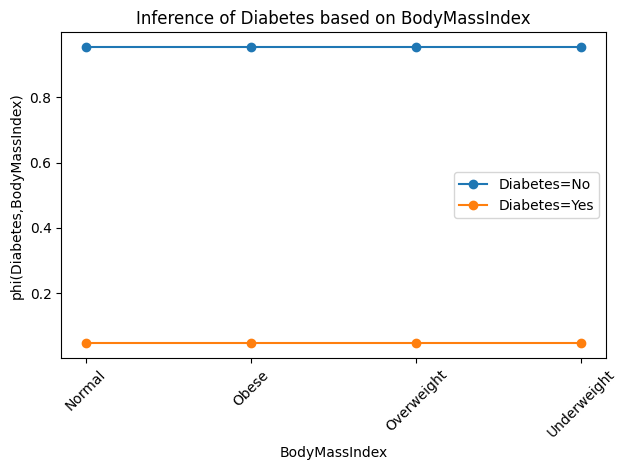

In [82]:
infer_and_plot(bayesian_model, 'Diabetes', 'BodyMassIndex')

BodyMassIndex - Normal
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8043 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1957 |
+-------------------+---------------------+
BodyMassIndex - Obese
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8115 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1885 |
+-------------------+---------------------+
BodyMassIndex - Overweight
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8081 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1919 |
+-------------------+---------------------+
Body

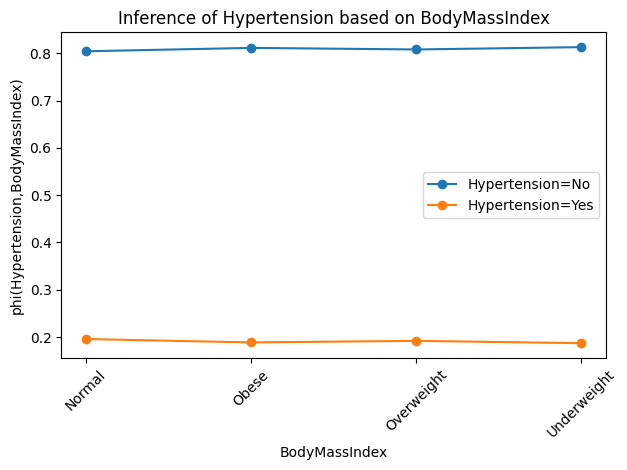

In [83]:
infer_and_plot(bayesian_model, 'Hypertension', 'BodyMassIndex')

BodyMassIndex - Normal
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.5921 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.4079 |
+---------------------------+-----------------------------+
BodyMassIndex - Obese
+---------------------------+-----------------------------+
| Hypercholesterolemia      |   phi(Hypercholesterolemia) |
+===========================+=============================+
| Hypercholesterolemia(No)  |                      0.6294 |
+---------------------------+-----------------------------+
| Hypercholesterolemia(Yes) |                      0.3706 |
+---------------------------+-----------------------------+
BodyMassIndex - Overweight
+---------------------------+-----------------------------+
| Hypercholesterolemia      

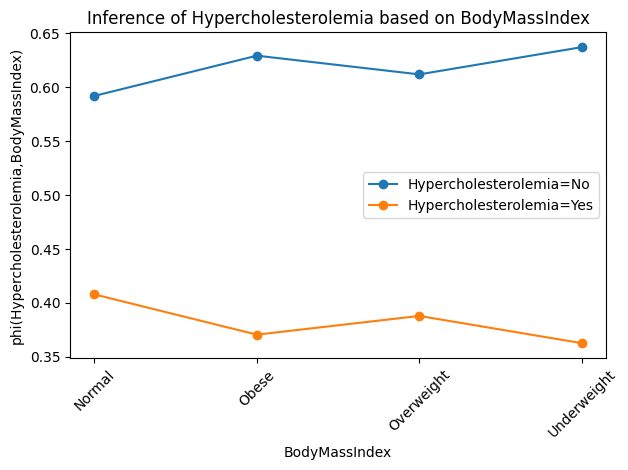

In [84]:
infer_and_plot(bayesian_model, 'Hypercholesterolemia', 'BodyMassIndex')

Anxiety - No
+---------------------------+----------------------+
| SmokerProfile             |   phi(SmokerProfile) |
+===========================+======================+
| SmokerProfile(Ex_Smoker)  |               0.1785 |
+---------------------------+----------------------+
| SmokerProfile(Non_Smoker) |               0.5447 |
+---------------------------+----------------------+
| SmokerProfile(Smoker)     |               0.2769 |
+---------------------------+----------------------+
Anxiety - Yes
+---------------------------+----------------------+
| SmokerProfile             |   phi(SmokerProfile) |
+===========================+======================+
| SmokerProfile(Ex_Smoker)  |               0.2146 |
+---------------------------+----------------------+
| SmokerProfile(Non_Smoker) |               0.5131 |
+---------------------------+----------------------+
| SmokerProfile(Smoker)     |               0.2723 |
+---------------------------+----------------------+


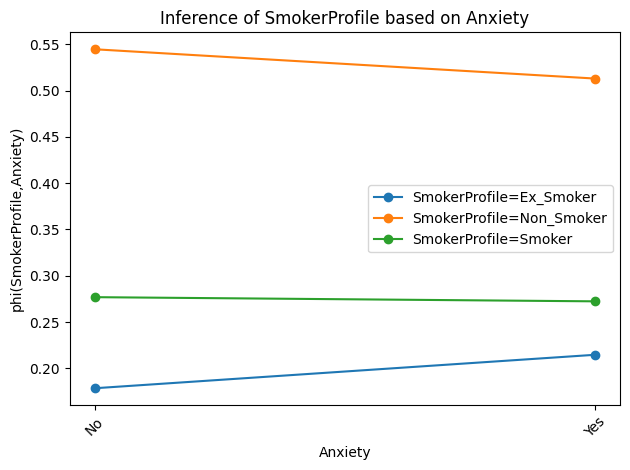

In [85]:
infer_and_plot(bayesian_model, 'SmokerProfile', 'Anxiety')

PhysicalActivity - Insufficiently Active
+----------------------------+----------------------+
| BodyMassIndex              |   phi(BodyMassIndex) |
+============================+======================+
| BodyMassIndex(Normal)      |               0.3427 |
+----------------------------+----------------------+
| BodyMassIndex(Obese)       |               0.2626 |
+----------------------------+----------------------+
| BodyMassIndex(Overweight)  |               0.3663 |
+----------------------------+----------------------+
| BodyMassIndex(Underweight) |               0.0284 |
+----------------------------+----------------------+
PhysicalActivity - Regularly Active
+----------------------------+----------------------+
| BodyMassIndex              |   phi(BodyMassIndex) |
+============================+======================+
| BodyMassIndex(Normal)      |               0.3663 |
+----------------------------+----------------------+
| BodyMassIndex(Obese)       |               0.2245 |
+----

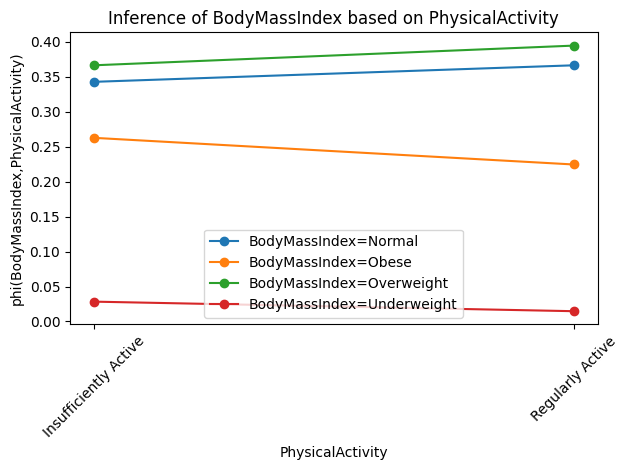

In [86]:
infer_and_plot(bayesian_model, 'BodyMassIndex', 'PhysicalActivity')

# Classification of the three medical conditions

# Improving classification results

# Conclusion